# Zonal Stats

In [3]:
import rasterio
from rasterio import mask
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np

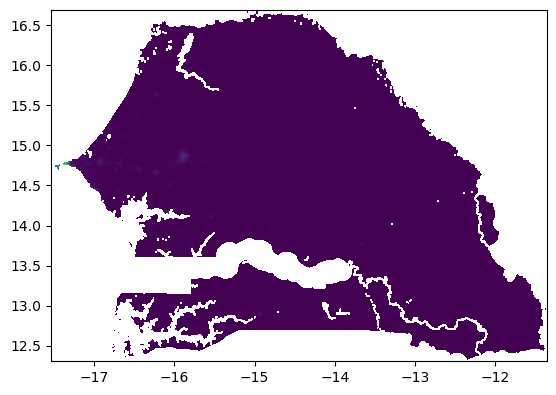

In [13]:
raster_filepath = "../data/sen_ppp_2006.tiff"
with rasterio.open(raster_filepath) as dataset:
    show(dataset)

opens street maps 

In [4]:
region_gdf = ox.features_from_place("Département de Saint-Louis", tags={"admin_level": "8"})
region_gdf.explore()

##  Population 

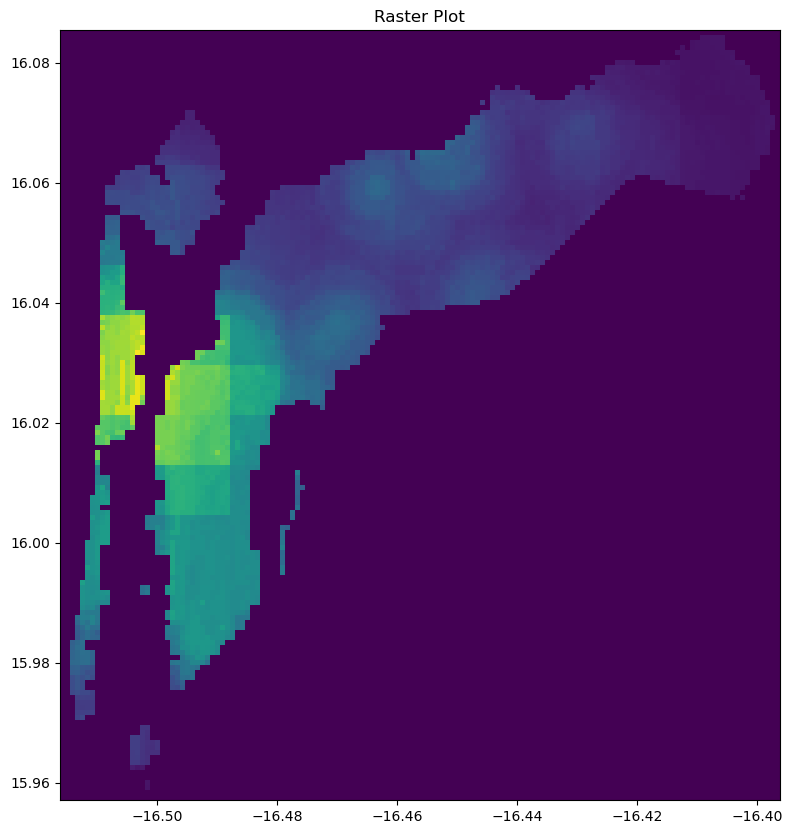

In [18]:
# Open the downloaded raster file using rasterio

# xmin, ymin, xmax, ymax = ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs).total_bounds
with rasterio.open(raster_filepath) as dataset:
    fig, ax = plt.subplots(figsize=(10, 10))
    img, tr = mask.mask(dataset, ox.geocode_to_gdf("saint louis senegal").to_crs(dataset.crs)["geometry"], crop=True, nodata=0)
    show(img, ax=ax, cmap='viridis', transform=tr)
        # plt.imshow(img[0])
    plt.title('Raster Plot')
    plt.show()

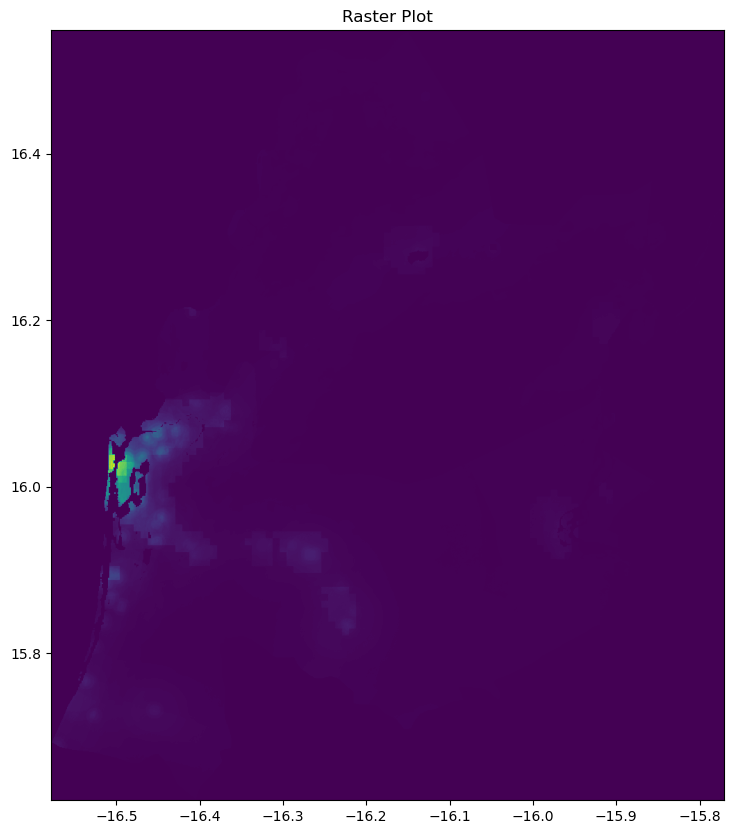

In [19]:
# Open the downloaded raster file using rasterio

with rasterio.open(raster_filepath) as dataset:
        # xmin, ymin, xmax, ymax = ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs).total_bounds
    fig, ax = plt.subplots(figsize=(10, 10))
    img, tr = mask.mask(dataset, region_gdf.to_crs(dataset.crs)["geometry"], crop=True, nodata=0)
    show(img, ax=ax, cmap='viridis', transform=tr)
        # plt.imshow(img[0])
    plt.title('Raster Plot')
    plt.show()

In [21]:
img[img != -99999].sum() # gente que vive en la region 

407708.2

rasterstats doc 

point sur min, max, ...

In [8]:
stats = zonal_stats(region_gdf, "../data/sen_ppp_2006.tiff", stats=["mean","min", "max", "sum", "count"])

In [137]:
stats

[{'min': 0.32616403698921204,
  'max': 0.7700324654579163,
  'mean': 0.5029173181412068,
  'count': 235,
  'sum': 118.1855697631836},
 {'min': 0.12919899821281433,
  'max': 1.1744413375854492,
  'mean': 0.36012806225848454,
  'count': 465,
  'sum': 167.4595489501953},
 {'min': 8.10580825805664,
  'max': 23.55605697631836,
  'mean': 13.188333650914634,
  'count': 41,
  'sum': 540.7216796875},
 {'min': 19.844755172729492,
  'max': 21.945463180541992,
  'mean': 20.92852783203125,
  'count': 3,
  'sum': 62.78558349609375},
 {'min': 21.841262817382812,
  'max': 22.19426918029785,
  'mean': 21.95893096923828,
  'count': 3,
  'sum': 65.87679290771484},
 {'min': 0.36141544580459595,
  'max': 21.841262817382812,
  'mean': 3.44618080104638,
  'count': 221,
  'sum': 761.60595703125},
 {'min': 21.33177947998047,
  'max': 22.19426918029785,
  'mean': 21.62085723876953,
  'count': 3,
  'sum': 64.8625717163086},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'mean': 21.336524963378906,
 

### atention stat et stats 

In [44]:
[stat["sum"] for stat in stats] 

[118.1855697631836,
 167.4595489501953,
 540.7216796875,
 62.78558349609375,
 65.87679290771484,
 761.60595703125,
 64.8625717163086,
 21.336524963378906,
 21.336524963378906,
 42.33189010620117,
 21.336524963378906,
 53925.609375,
 23882.61328125,
 52484.640625,
 32389.90234375,
 45507.7734375,
 98945.1171875,
 1353.341796875,
 353.6141357421875,
 1022.3507690429688,
 28142.99609375,
 34186.64453125,
 35512.46484375]

In [46]:
pd.DataFrame(stats)["sum"]

0       118.185570
1       167.459549
2       540.721680
3        62.785583
4        65.876793
5       761.605957
6        64.862572
7        21.336525
8        21.336525
9        42.331890
10       21.336525
11    53925.609375
12    23882.613281
13    52484.640625
14    32389.902344
15    45507.773438
16    98945.117188
17     1353.341797
18      353.614136
19     1022.350769
20    28142.996094
21    34186.644531
22    35512.464844
Name: sum, dtype: float64

In [11]:
region_gdf["pop"] = pd.DataFrame(stats, index=region_gdf.index)["sum"]

In [13]:
region_gdf["pop_list"] = [stat["sum"] for stat in stats]

In [14]:
region_gdf.head()

source  \
element_type osmid                    
way          228077890  ARD_STL;CSE   
             228077921  ARD_STL;CSE   
             357664716  ARD_STL;CSE   
             357759073  ARD_STL;CSE   
             396524432  ARD_STL;CSE   

                                                                 geometry  \
element_type osmid                                                          
way          228077890  LINESTRING (-16.32187 16.02216, -16.33758 16.0...   
             228077921  LINESTRING (-16.15109 16.27299, -16.15342 16.2...   
             357664716  LINESTRING (-16.47767 16.02945, -16.47788 16.0...   
             357759073  LINESTRING (-16.47767 16.02945, -16.47766 16.0...   
             396524432  LINESTRING (-16.47751 16.02513, -16.47742 16.0...   

                       admin_level name name:ar name:en name:he name:ko  \
element_type osmid                                                        
way          228077890           8  NaN     NaN     NaN     NaN     NaN   
             228077921           8  NaN     NaN     NaN     NaN     NaN   
             357664716           8  NaN     NaN     NaN     NaN     NaN   
             357759073           8  NaN     NaN     NaN     NaN     NaN   
             396524432           8  NaN     NaN     NaN     NaN     NaN   

                       name:ru name:uk  ...  \
element_type osmid                      ...   
way          228077890     NaN     NaN  ...   
             228077921     NaN     NaN  ...   
             357664716     NaN     NaN  ...   
             357759073     NaN     NaN  ...   
             396524432     NaN     NaN  ...   

                                                                    nodes  \
element_type osmid                                                          
way          228077890  [2367255470, 2367255391, 2367255195, 236725512...   
             228077921  [8930163817, 2367256362, 2367256357, 236725635...   
             357664716  [3628497224, 3628497633, 3628496732, 362849767...   
             357759073  [3628497224, 3993692568, 3993692583, 399369181...   
             396524432  [3993366236, 3993385004, 3993384871, 399338487...   

                              boundary waterway layer tunnel seasonal ways  \
element_type osmid                                                           
way          228077890  administrative      NaN   NaN    NaN      NaN  NaN   
             228077921  administrative      NaN   NaN    NaN      NaN  NaN   
             357664716  administrative    river   NaN    NaN      yes  NaN   
             357759073  administrative   stream   NaN    NaN      NaN  NaN   
             396524432  administrative      NaN   NaN    NaN      NaN  NaN   

                       type         pop    pop_list  
element_type osmid                                   
way          228077890  NaN  118.185570  118.185570  
             228077921  NaN  167.459549  167.459549  
             357664716  NaN  540.721680  540.721680  
             357759073  NaN   62.785583   62.785583  
             396524432  NaN   65.876793   65.876793  

[5 rows x 24 columns]

In [49]:
stats

[{'min': 0.32616403698921204,
  'max': 0.7700324654579163,
  'sum': 118.1855697631836},
 {'min': 0.12919899821281433,
  'max': 1.1744413375854492,
  'sum': 167.4595489501953},
 {'min': 8.10580825805664, 'max': 23.55605697631836, 'sum': 540.7216796875},
 {'min': 19.844755172729492,
  'max': 21.945463180541992,
  'sum': 62.78558349609375},
 {'min': 21.841262817382812,
  'max': 22.19426918029785,
  'sum': 65.87679290771484},
 {'min': 0.36141544580459595,
  'max': 21.841262817382812,
  'sum': 761.60595703125},
 {'min': 21.33177947998047, 'max': 22.19426918029785, 'sum': 64.8625717163086},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 20.995365142822266,
  'max': 21.336524963378906,
  'sum': 42.33189010620117},
 {'min': 21.336524963378906,
  'max': 21.336524963378906,
  'sum': 21.336524963378906},
 {'min': 0.12818112969398499, 'max': 17.96164321899414, '

In [61]:
stats_df = pd.DataFrame(stats)

In [142]:
stats_df

,min,max,mean,count,sum
0,0.326164,0.770032,0.502917,235,118.185570
1,0.129199,1.174441,0.360128,465,167.459549
2,8.105808,23.556057,13.188334,41,540.721680
3,19.844755,21.945463,20.928528,3,62.785583
4,21.841263,22.194269,21.958931,3,65.876793
5,0.361415,21.841263,3.446181,221,761.605957
6,21.331779,22.194269,21.620857,3,64.862572
7,21.336525,21.336525,21.336525,1,21.336525
8,21.336525,21.336525,21.336525,1,21.336525
9,20.995365,21.336525,21.165945,2,42.331890


In [53]:
stats_df["sum"].sum()

409594.90758895874

sum entre count(pixel ) es lo mateix que media cuanta pobacion hay en un pixel 

In [59]:
stats_df["sum"].div(stats_df["count"])

0      0.502917
1      0.360128
2     13.188334
3     20.928528
4     21.958931
5      3.446181
6     21.620857
7     21.336525
8     21.336525
9     21.165945
10    21.336525
11     0.405865
12     0.682321
13     1.452701
14     0.235724
15     2.880786
16    17.593371
17     4.138660
18     2.296196
19     7.804204
20     0.291722
21     0.583818
22     0.822105
dtype: float64

In [62]:
stats_df["mean"]

0      0.502917
1      0.360128
2     13.188334
3     20.928528
4     21.958931
5      3.446181
6     21.620857
7     21.336525
8     21.336525
9     21.165945
10    21.336525
11     0.405865
12     0.682321
13     1.452701
14     0.235724
15     2.880786
16    17.593371
17     4.138660
18     2.296196
19     7.804204
20     0.291722
21     0.583818
22     0.822105
Name: mean, dtype: float64

In [169]:
city_aoi = "saint louis senegal"

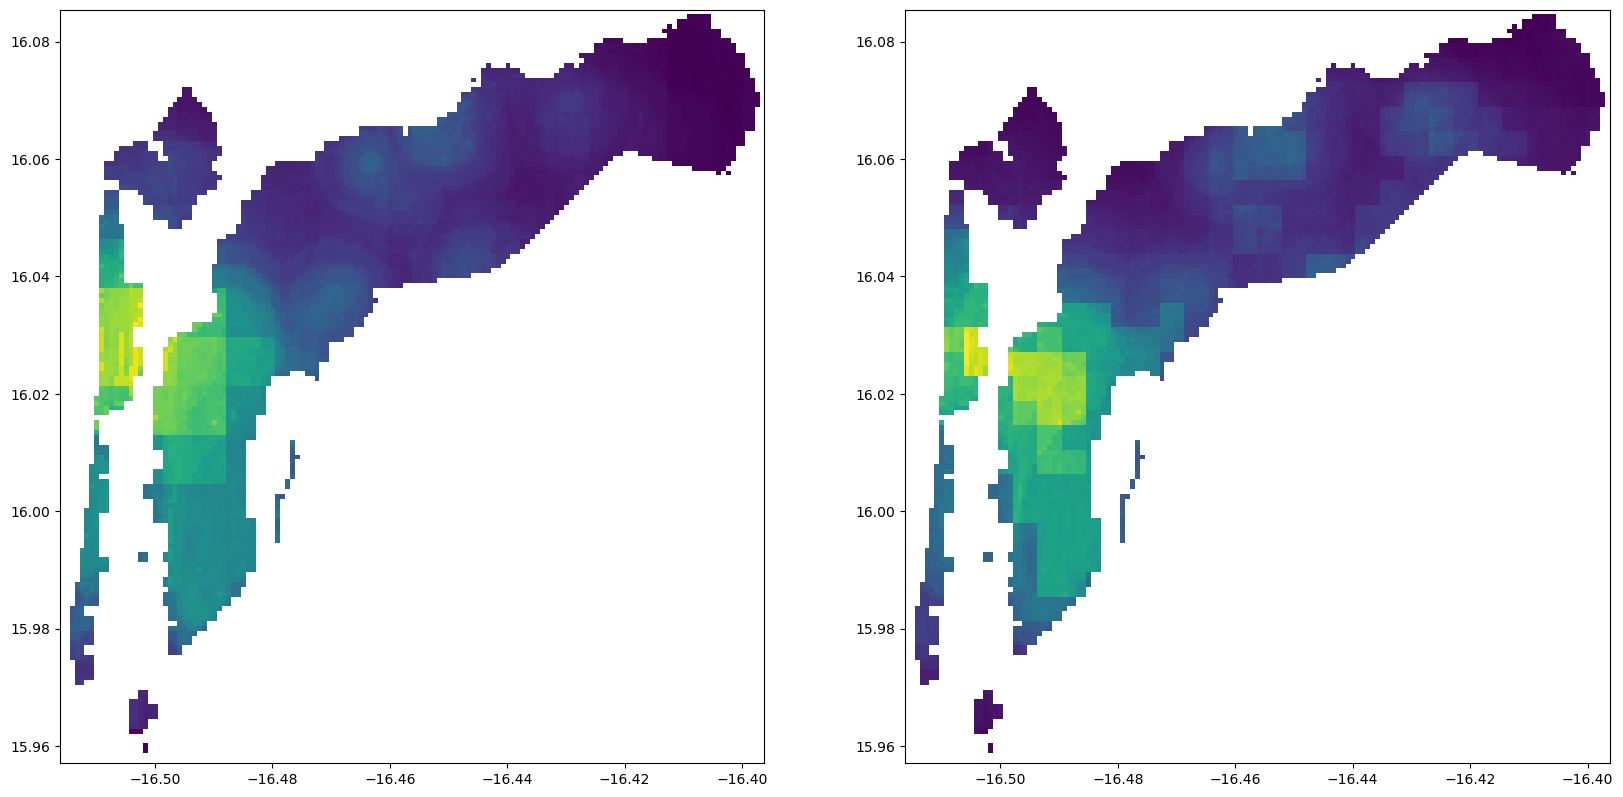

In [170]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
# Load population raster
with rasterio.open('../data/sen_ppp_2006.tiff') as pop_src:
    #pop_array = pop_src.read(1)
    pop06_array, tr = mask.mask(pop_src, ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs)["geometry"], crop=True)
    pop06_array[pop06_array == pop_src.nodata] = np.nan
    pop06_array = pop06_array[0]
    show(pop06_array,transform=tr, ax=axes[0])
    

# Load night lights raster
with rasterio.open('../data/sen_ppp_2018.tiff') as lights_src:
    #lights_array = lights_src.read(1)
    pop18_array, tr = mask.mask(lights_src, ox.geocode_to_gdf(city_aoi).to_crs(dataset.crs)["geometry"], crop=True)
    pop18_array[pop18_array == lights_src.nodata] = np.nan
    pop18_array = pop18_array[0]
    show(pop18_array, transform=tr, ax=axes[1])


In [163]:
pop_variation = pop18_array - pop06_array

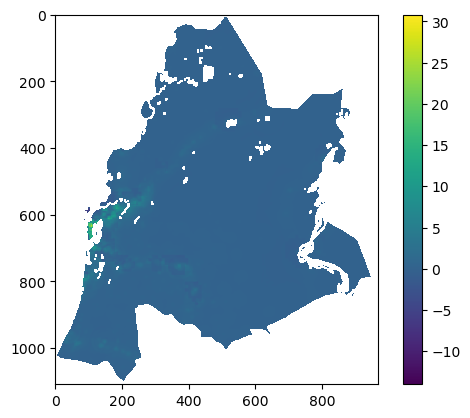

In [164]:
plt.imshow(pop_variation)
plt.colorbar()